In [1]:
#import usual packages for data manipulation
import pandas as pd
import numpy as np

#import usual packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import datetime to get the current date
import datetime as dt

import json

#set the style of the plots
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
my_key = 'DJ3QKKTFZ5J298QY'

In [3]:
from alpha_vantage.fundamentaldata import FundamentalData
fd = FundamentalData(key=my_key)

In [4]:
#choose a ticker
ticker = 'GOOG'

In [5]:
#get quarterly earnings for "ticker"
df_earnings, _ = fd.get_earnings_quarterly(ticker)

#get quarterly balance sheet for "ticker"
df_balance, _ = fd.get_balance_sheet_quarterly(ticker)

#get quarterly cash flow for "ticker"
df_cashflow, _ = fd.get_cash_flow_quarterly(ticker)

#get quarterly income statement for "ticker"
df_income, _ = fd.get_income_statement_quarterly(ticker)

In [380]:
df_earnings

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,reportTime
0,2024-06-30,2024-07-23,1.89,1.85,0.04,2.1622,post-market
1,2024-03-31,2024-04-25,1.89,1.51,0.38,25.1656,post-market
2,2023-12-31,2024-01-30,1.64,1.59,0.05,3.1447,post-market
3,2023-09-30,2023-10-23,1.55,1.45,0.1,6.8966,pre-market
4,2023-06-30,2023-07-25,1.44,1.34,0.1,7.4627,post-market
5,2023-03-31,2023-04-25,1.17,1.06,0.11,10.3774,post-market
6,2022-12-31,2023-02-02,1.05,1.19,-0.14,-11.7647,post-market
7,2022-09-30,2022-10-25,1.06,1.25,-0.19,-15.2,post-market
8,2022-06-30,2022-07-26,1.21,1.3,-0.09,-6.9231,post-market
9,2022-03-31,2022-04-26,1.23,1.29,-0.06,-4.6512,post-market


In [100]:
df_e = df_earnings.copy()
df_b = df_balance.copy()
df_c = df_cashflow.copy()
df_i = df_income.copy()
cols = []
for df in [df_e, df_b, df_c, df_i]:
    
    #if any dates are duplicated, keep the first one and drop the rest
    df.drop_duplicates(subset='fiscalDateEnding',keep='first',inplace=True) 

    #drop all columns with at least 10 missing values
    df.dropna(axis=1,thresh=df.shape[0]-10,inplace=True)
    
    #convert the 'fiscalDateEnding' column to datetime and set it as the index
    df['date'] = pd.to_datetime(df['fiscalDateEnding'])
    df.drop(columns='fiscalDateEnding',inplace=True)
    df.set_index('date',inplace=True)

    #drop all rows corresponding to years before 2014
    df.drop(df[df.index.year < 2016].index,inplace=True)

    new_cols = list(set(df.columns.to_list()) - set(cols))
    cols += new_cols
    df = df[new_cols]
#merge into a single dataframe
df_financials = pd.concat([df_e,df_b,df_c,df_i],axis=1,join='outer')
#write to csv
df_financials.to_csv(f'../data/{ticker}_financials.csv')

In [369]:
df_financials

,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,reportTime,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
date,,,,,,,,,,,,,,,,,,,,,
2024-06-30,2024-07-23,1.89,1.85,0.04,2.1622,post-market,USD,414770000000,161995000000,27225000000,...,3708000000,3708000000,27551000000,3932000000,67000000,23619000000,23446000000,27425000000,31031000000,23619000000
2024-03-31,2024-04-25,1.89,1.51,0.38,25.1656,post-market,USD,407350000000,165471000000,24493000000,...,3413000000,3413000000,28315000000,4653000000,94000000,23662000000,23225000000,28409000000,28885000000,23662000000
2023-12-31,2024-01-30,1.64,1.59,0.05,3.1447,post-market,USD,402392000000,171530000000,24048000000,...,None,1563000000,24412000000,3725000000,69000000,20687000000,23321000000,24481000000,25260000000,20687000000
2023-09-30,2023-10-23,1.55,1.45,0.1,6.8966,pre-market,USD,396711000000,176310000000,30702000000,...,None,3800000000,21197000000,1508000000,116000000,19689000000,18644000000,21313000000,25143000000,19689000000
2023-06-30,2023-07-25,1.44,1.34,0.1,7.4627,post-market,USD,383044000000,168788000000,25929000000,...,2824000000,4282000000,21903000000,3535000000,43000000,18368000000,18377000000,21946000000,26120000000,18368000000
2023-03-31,2023-04-25,1.17,1.06,0.11,10.3774,post-market,USD,369491000000,161985000000,25924000000,...,2635000000,4182000000,18205000000,3154000000,80000000,15051000000,16654000000,18285000000,21597000000,15051000000
2022-12-31,2023-02-02,1.05,1.19,-0.14,-11.7647,post-market,USD,365264000000,164795000000,21879000000,...,None,5126000000,17147000000,3523000000,90000000,13624000000,14873000000,17237000000,23286000000,13624000000
2022-09-30,2022-10-25,1.06,1.25,-0.19,-15.2,post-market,USD,358255000000,166109000000,21984000000,...,None,4759000000,16233000000,2323000000,101000000,13910000000,10886000000,16334000000,21894000000,13910000000
2022-06-30,2022-07-26,1.21,1.3,-0.09,-6.9231,post-market,USD,355185000000,172371000000,17936000000,...,None,4844000000,19014000000,3012000000,83000000,16002000000,14223000000,19097000000,24297000000,16002000000


In [102]:
#make a dataframe with financial ratios
df_ratios = df_e[['reportedEPS', 'estimatedEPS', 'surprise', 'surprisePercentage']].astype(float)
new_df = pd.DataFrame({'reportedDate': df_e['reportedDate'],
                       'debt_to_equity': df_b['totalLiabilities'].astype(float) / df_b['totalShareholderEquity'].astype(float),
                       'current_ratio': df_b['totalCurrentAssets'].astype(float) / df_b['totalCurrentLiabilities'].astype(float),
                       'return_on_equity': df_i['netIncome'].astype(float) / df_b['totalShareholderEquity'].astype(float)})
df_ratios = df_ratios.join(new_df, how='outer')
df_ratios

,reportedEPS,estimatedEPS,surprise,surprisePercentage,reportedDate,debt_to_equity,current_ratio,return_on_equity
date,,,,,,,,
2016-03-31,0.3750,0.3980,-0.0230,-5.7789,2016-04-21,0.211849,5.143350,0.034046
2016-06-30,0.4210,0.4015,0.0195,4.8568,2016-07-28,0.206547,5.434404,0.038138
2016-09-30,0.4530,0.4320,0.0210,4.8611,2016-10-27,0.192725,6.880263,0.037740
2016-12-31,0.4680,0.4835,-0.0155,-3.2058,2017-01-26,0.204702,6.290762,0.038357
2017-03-31,0.3865,0.3695,0.0170,4.6008,2017-04-27,0.191840,7.131227,0.037434
2017-06-30,0.2505,0.2235,0.0270,12.0805,2017-07-24,0.204571,6.014771,0.023765
2017-09-30,0.4785,0.4165,0.0620,14.8860,2017-10-26,0.206467,5.767409,0.042852
2017-12-31,0.4850,0.4980,-0.0130,-2.6104,2018-02-01,0.293721,5.140305,-0.019803
2018-03-31,0.6665,0.4660,0.2005,43.0258,2018-04-23,0.286709,4.873632,0.058455


In [371]:
df_ratios.to_csv('../data/GOOG_ratios.csv')

In [80]:
#next, we still have a few price-related ratios to calculate. for this, we first pull stock data from alpha_vantage TimeSeries
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key=my_key)

In [82]:
df_stock, _ = ts.get_daily(ticker,outputsize='full')

In [318]:
df = pd.DataFrame(df_stock).T
df.columns = ['open', 'high', 'low', 'close', 'volume']
df.index = pd.to_datetime(df.index)
df.index.name = 'date'
df = df.astype(float)
# df.to_csv(f'../data/{ticker}_stock.csv')

In [23]:
df = pd.read_csv('../data/MSFT_stock.csv',index_col='date',parse_dates=True,dtype=float)
df.columns = ['open', 'high', 'low', 'close', 'volume']
df.sort_index(ascending=True,inplace=True)
df[df.index.year >= 2014]
df.to_csv('../data/MSFT2_stock.csv')

In [24]:
tickers=['MSFT','GOOG']

In [25]:
def wtd_std(vals,wts):
    wtd_mean = np.average(vals,weights=wts)
    vals_demeaned = vals - wtd_mean
    wtd_var = np.average(vals_demeaned**2,weights=wts)
    return np.sqrt(wtd_var)

def get_wtd_std(vals,wts,w):
    ser = np.zeros(len(df))
    for i in range(len(df)-1 , 0, -1):
        if i < w:
            ser[i] = np.nan
        else:
            ser[i] = wtd_std(vals.iloc[i-w+1:i+1],wts.iloc[i-w+1:i+1])
    return ser

In [26]:
def stock_data_cleaner(ticker):
    df = pd.read_csv(f'../data/{ticker}_stock.csv',index_col='date',parse_dates=True,dtype=float)
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    df.sort_index(ascending=True,inplace=True)
    # #daily price weighted by volume
    # df['VWP'] = df['close'] * df['volume'] 
    #window sizes for moving avgs and volume-weighted moving avgs
    windows = [5, 11, 21, 63, 125, 251]
    #calculate past moving averages, standard dev's, volume-weighted moving averages, and standard dev's of volume-weighted moving averages
    for w in windows:
        df[f'ma_{w}'] = df['close'].rolling(w).mean()
        df[f'std_{w}'] = df['close'].rolling(w).std()
        #compute the w-day volume weights
        df[f'wts_{w}'] = df['volume'] / df['volume'].rolling(w).sum()
        #compute VWAP by dotting the w-day close price with the w-day volume weights
        df[f'vwap_{w}'] = (df['close'] * df[f'wts_{w}']).rolling(w).sum()
        #compute the weighted standard deviation of the volume-weighted moving averages
        df[f'vwstd_{w}'] = get_wtd_std(df[f'close'],df[f'wts_{w}'],w)
        #drop the volume weights
        df.drop(columns=f'wts_{w}',inplace=True)
    #drop NaN's
    df.dropna(inplace=True)
    # add rolling bollinger bands for windows w in [5,11,21,63,125,251]
    # bollinger bands are defined as the moving average plus/minus 2 times the moving standard deviation
    # store the upper and lower bands in columns f'bbu_{w}' and f'bbl_{w}'
    # do the same for the vol-weighted averages and standard deviations
    for w in windows:
        df[f'bbu_{w}'] = df[f'ma_{w}'] + 2 * df[f'std_{w}']
        df[f'bbl_{w}'] = df[f'ma_{w}'] - 2 * df[f'std_{w}']
        df[f'vwbbu_{w}'] = df[f'vwap_{w}'] + 2 * df[f'vwstd_{w}']
        df[f'vwbbl_{w}'] = df[f'vwap_{w}'] - 2 * df[f'vwstd_{w}']
    df

In [5]:
# we want to plot the stock data 'close' price for the year 2022
# make 10 subplots (5 rows and 2 columns)
# the rows correspond to w in windows, the columns correspond to the moving average and the volume-weighted moving average
# on each subplot, plot the close price in black, the moving avg (or vwap) in blue, and shade the region between the upper and lower bollinger bands in light blue
# label the close price and the moving average (or vwap) with the corresponding window size, e.g. '5-day MA' or '11-day VWAP'
# set the title of each subplot to the corresponding window size, e.g. '5-day averages'
# set the title of the entire plot to f'{ticker} close price for 2022'
def plot_bollinger(temp,ticker,windows):
    fig, axs = plt.subplots(len(windows),2,figsize=(20,15),sharex=True)
    for i, w in enumerate(windows):
        axs[i,0].plot(temp.index,temp['close'],color='black',label='close',linewidth=0.5)
        axs[i,0].plot(temp.index,temp[f'ma_{w}'],color='blue',label=f'{w}-day MA',linewidth=0.5)
        axs[i,0].fill_between(temp.index,temp[f'bbu_{w}'],temp[f'bbl_{w}'],color='lightblue')
        # axs[i,0].set_title(f'{w}-day averages')
        axs[i,0].legend()
        axs[i,1].plot(temp.index,temp['close'],color='black',label='close',linewidth=0.5)
        axs[i,1].plot(temp.index,temp[f'vwap_{w}'],color='red',label=f'{w}-day VWAP',linewidth=0.5)
        axs[i,1].fill_between(temp.index,temp[f'vwbbu_{w}'],temp[f'vwbbl_{w}'],color='pink')
        # axs[i,1].set_title(f'{w}-day volume-weighted averages')
        axs[i,1].legend()
    fig.suptitle(f'{ticker} close price for 2022')
    plt.tight_layout()
    plt.show()

In [27]:
stock_dict = {ticker:stock_data_cleaner(ticker) for ticker in tickers}

ZeroDivisionError: Weights sum to zero, can't be normalized

KeyError: 'ma_5'

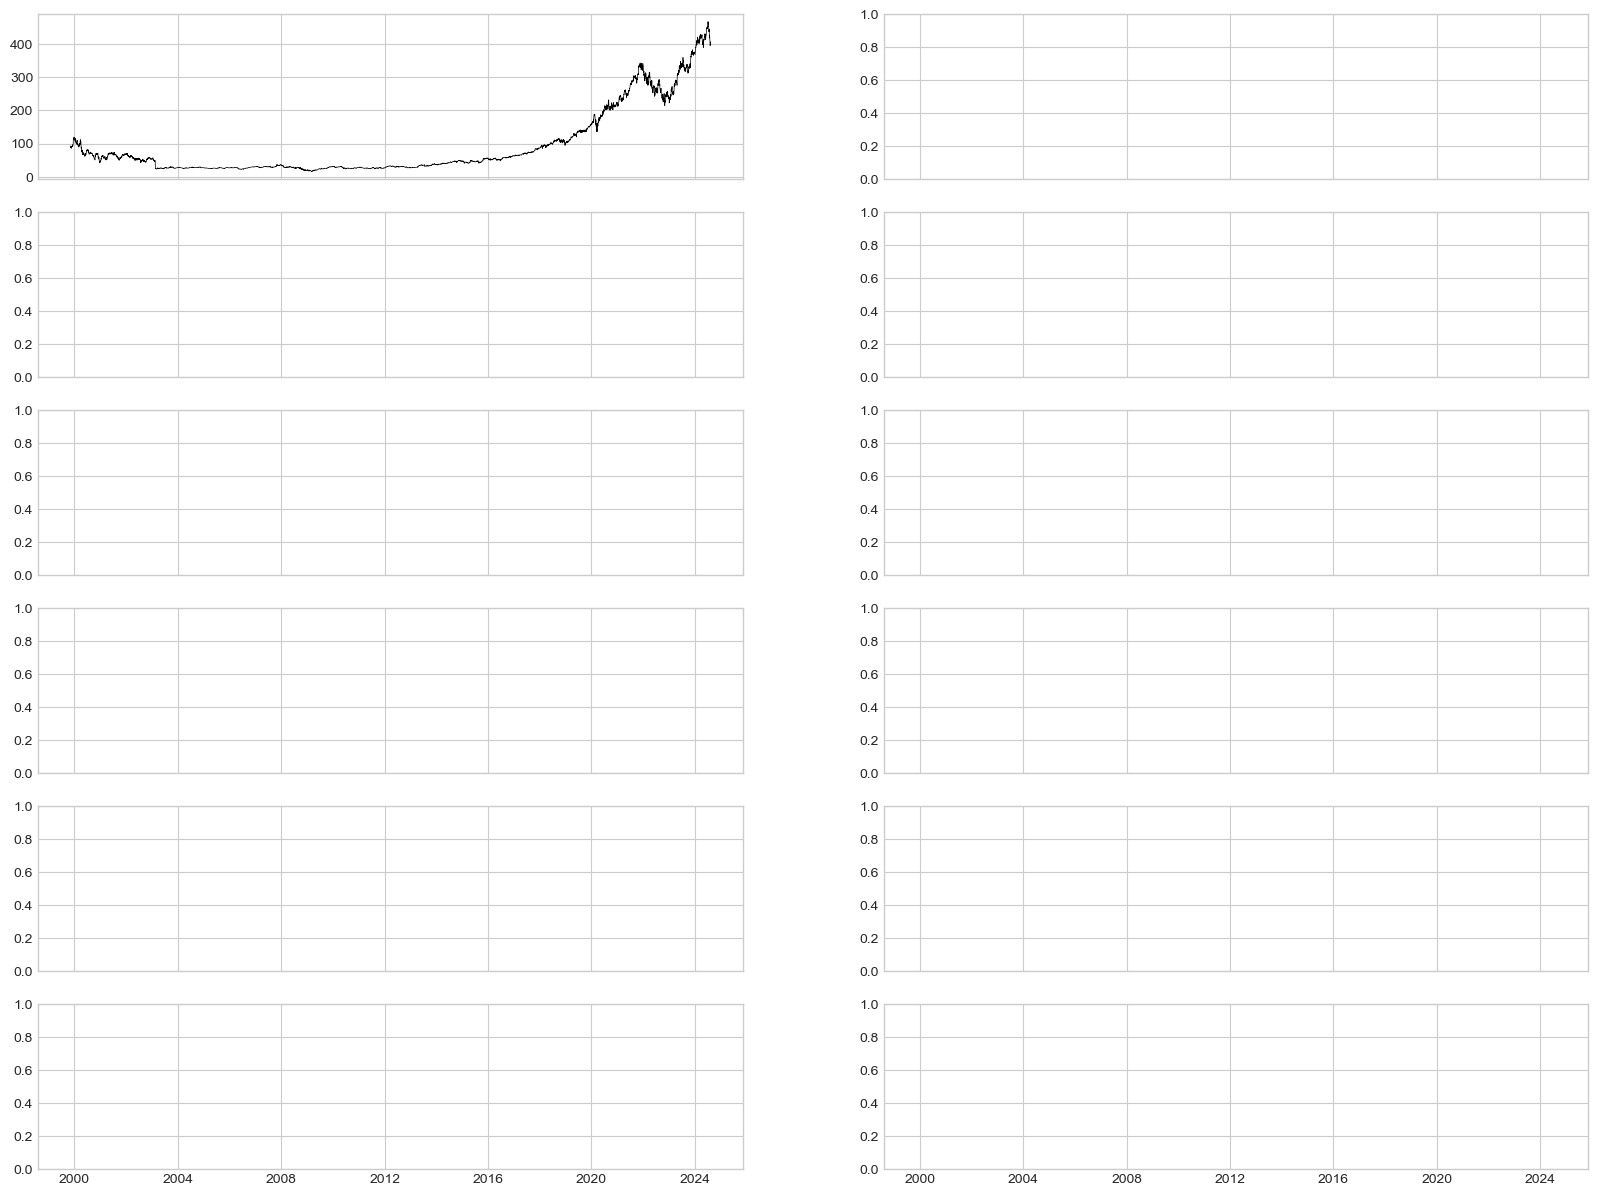

In [28]:
# temp = np.log(df[df.index.year.isin([2022,2023])]).copy()
temp = df.copy()
plot_bollinger(temp,ticker,windows)

In [290]:
log_df = np.log(df)
log_df.dropna(inplace=True)
log_df

,open,high,low,close,volume,VWP,MA5,VWAP5,MA11,VWAP11,MA21,VWAP21,MA63,VWAP63,MA125,VWAP125,MA251,VWAP251
date,,,,,,,,,,,,,,,,,,
2000-10-26,4.110874,4.175310,4.107754,4.165735,17.865787,22.031521,4.141578,4.141387,4.059016,4.078168,4.049945,4.063895,4.175193,4.152801,4.225365,4.206131,4.415490,4.401363
2000-10-27,4.169607,4.236856,4.168524,4.214938,17.945000,22.159939,4.149495,4.146649,4.079692,4.094700,4.055224,4.071367,4.174675,4.153029,4.225110,4.205794,4.414301,4.399839
2000-10-30,4.212128,4.250208,4.210200,4.234976,17.823367,22.058343,4.171120,4.168274,4.102959,4.112565,4.062420,4.078719,4.174766,4.154166,4.224934,4.205838,4.413167,4.398597
2000-10-31,4.234107,4.241327,4.219508,4.232221,17.771302,22.003522,4.193617,4.186514,4.130355,4.135023,4.070369,4.085858,4.174644,4.154999,4.224750,4.205908,4.412050,4.397424
2000-11-01,4.226834,4.249352,4.225957,4.243052,17.520625,21.763677,4.218566,4.216533,4.158002,4.151411,4.080930,4.093330,4.174490,4.155381,4.224575,4.206007,4.410980,4.396425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-06,5.991465,6.005540,5.987707,5.990489,17.032245,23.022734,6.010635,6.011295,6.037172,6.031140,6.072303,6.060932,6.072209,6.066883,6.048100,6.043955,5.961922,5.954839
2024-08-07,6.012822,6.016352,5.985119,5.987532,16.843270,22.830802,6.000816,6.000475,6.027042,6.025499,6.065570,6.055508,6.071810,6.066438,6.047804,6.043665,5.962664,5.955581
2024-08-08,5.997546,6.006008,5.991316,5.998167,16.821343,22.819510,5.993647,5.992653,6.021277,6.020592,6.058519,6.049852,6.071522,6.065825,6.047589,6.043455,5.963489,5.956401


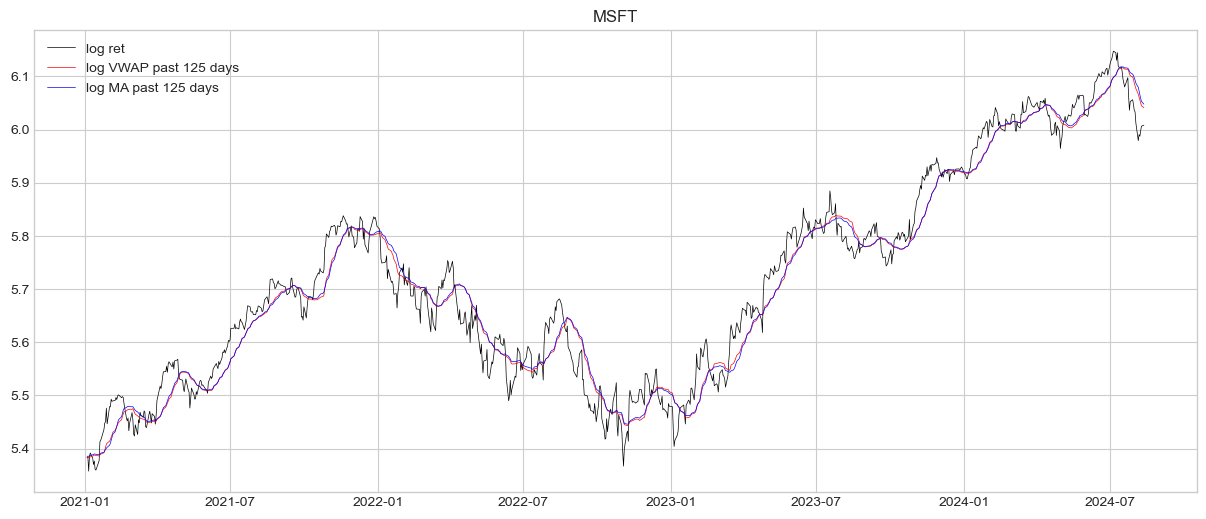

In [300]:
temp = log_df[log_df.index.year.isin([2021,2022,2023,2024])].copy()
# temp = log_df[log_df.index.year == 2022].copy()
first = temp['close'].iloc[0]
plt.figure(figsize=(15,6))
plt.plot(temp['close'],color='black',linewidth=0.5,label='log ret')
plt.plot(temp['VWAP21'],color='red',linewidth=0.5,label='log VWAP past 125 days')
plt.plot(temp['MA21'],color='blue',linewidth=0.5,label='log MA past 125 days')
# for i, w in enumerate([251]):
#     plt.plot(df[f'VWAP{w}_c'],linewidth=0.5,label=f'VWAP{w}',color=plt.cm.viridis(i/len(windows)))
plt.legend()
plt.title(f'{ticker}')
plt.show()

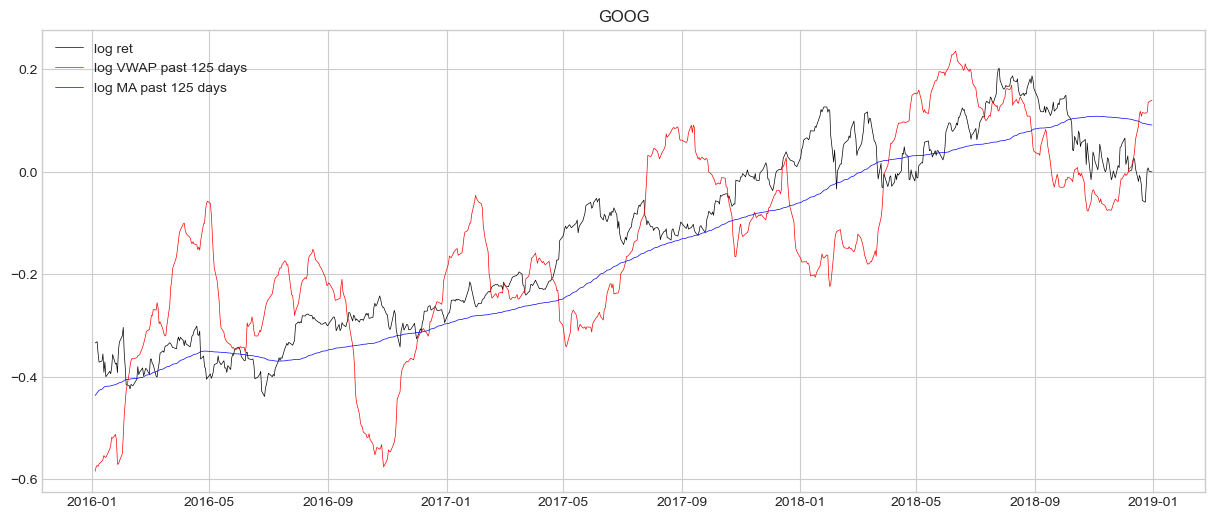

In [202]:
#plot the close price in black with linewight 0.5
#plot the centered VWAP columns in different colors (getting darker with increasing window size) with linewight 0.5
temp = df[df.index.year.isin([2016,2017,2018])]
first = np.log(temp['close']).iloc[0]
plt.figure(figsize=(15,6))
plt.plot(np.log(temp['close']) - first,color='black',linewidth=0.5,label='log ret')
plt.plot(np.log(temp['VWAP63_p']) - first,color='red',linewidth=0.5,label='log VWAP past 125 days')
plt.plot(np.log(temp['MA125_p']) - first,color='blue',linewidth=0.5,label='log MA past 125 days')
# for i, w in enumerate([251]):
#     plt.plot(df[f'VWAP{w}_c'],linewidth=0.5,label=f'VWAP{w}',color=plt.cm.viridis(i/len(windows)))
plt.legend()
plt.title(f'{ticker}')
plt.show()